In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm # Statistical computations and models for Python
import seaborn as sns
import os 


from pandas import Series, DataFrame

from patsy import dmatrices # A Python package for describing statistical models and for building design matrices.

from sklearn import  svm

import matplotlib.pyplot as plt
%matplotlib inline

# Глава 1. Изучение данных

In [2]:
#Загруза пути тренировочного и тестового датасетов
f = open(r'titanic_path.txt','r')
paths = f.readlines()
paths = list(map(lambda x: x.replace('\n',''),paths))
train_path = paths[0]
test_path = paths[1]

In [3]:
# Загрузка тренировочных данных
train_df = pd.read_csv(train_path)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# загрузка тестировочных данных
test_df = pd.read_csv(test_path)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


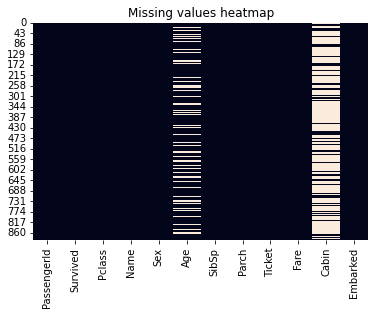

In [7]:
sns.heatmap(train_df.isnull(), cbar = False).set_title("Missing values heatmap")
plt.show()

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


В фичах возраст и номер кабины чрезвычайно много пустых значений, необходимо решить данную проблему

In [9]:
from sklearn.preprocessing import LabelEncoder

# Заполнение пропущенных значений самым вероятным вариантом
train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace = True)
# Выделение отдельного класса неизвестных кабин
train_df.Cabin = train_df.Cabin.fillna('NA')
# Офррмление пола как бинарного качественного параметра(1 - мужчина, 0 - женщина)
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
# Разбор параметра изначального города на 3 параметра
train_dummies = pd.get_dummies(train_df.Embarked, prefix="Emb", drop_first = False)
# Заполнение средним значением пропущенные значения возраста
train_df.Age.fillna(train_df.Age.median(), inplace = True)
train_dummies

,Emb_C,Emb_Q,Emb_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [10]:
print(train_df.shape, train_dummies.shape)

(891, 12) (891, 3)


In [11]:
train_df = pd.concat([train_df,train_dummies],axis = 1)

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Emb_C,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NA,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NA,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,0,0


Процент выживаемости в зависимости от пола

In [13]:
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.742038
1,0.188908


Процент выживших различного пола в зависимости от социально-экономического статуса

In [14]:
train_df.pivot_table('Survived', ['Sex', 'Pclass'], aggfunc=np.mean)

Survived
Sex Pclass          
0   1       0.968085
    2       0.921053
    3       0.500000
1   1       0.368852
    2       0.157407
    3       0.135447

Как видно на таблице,нахождение в первом классе значительно увеличивает шанс на выживание, независимо от пола

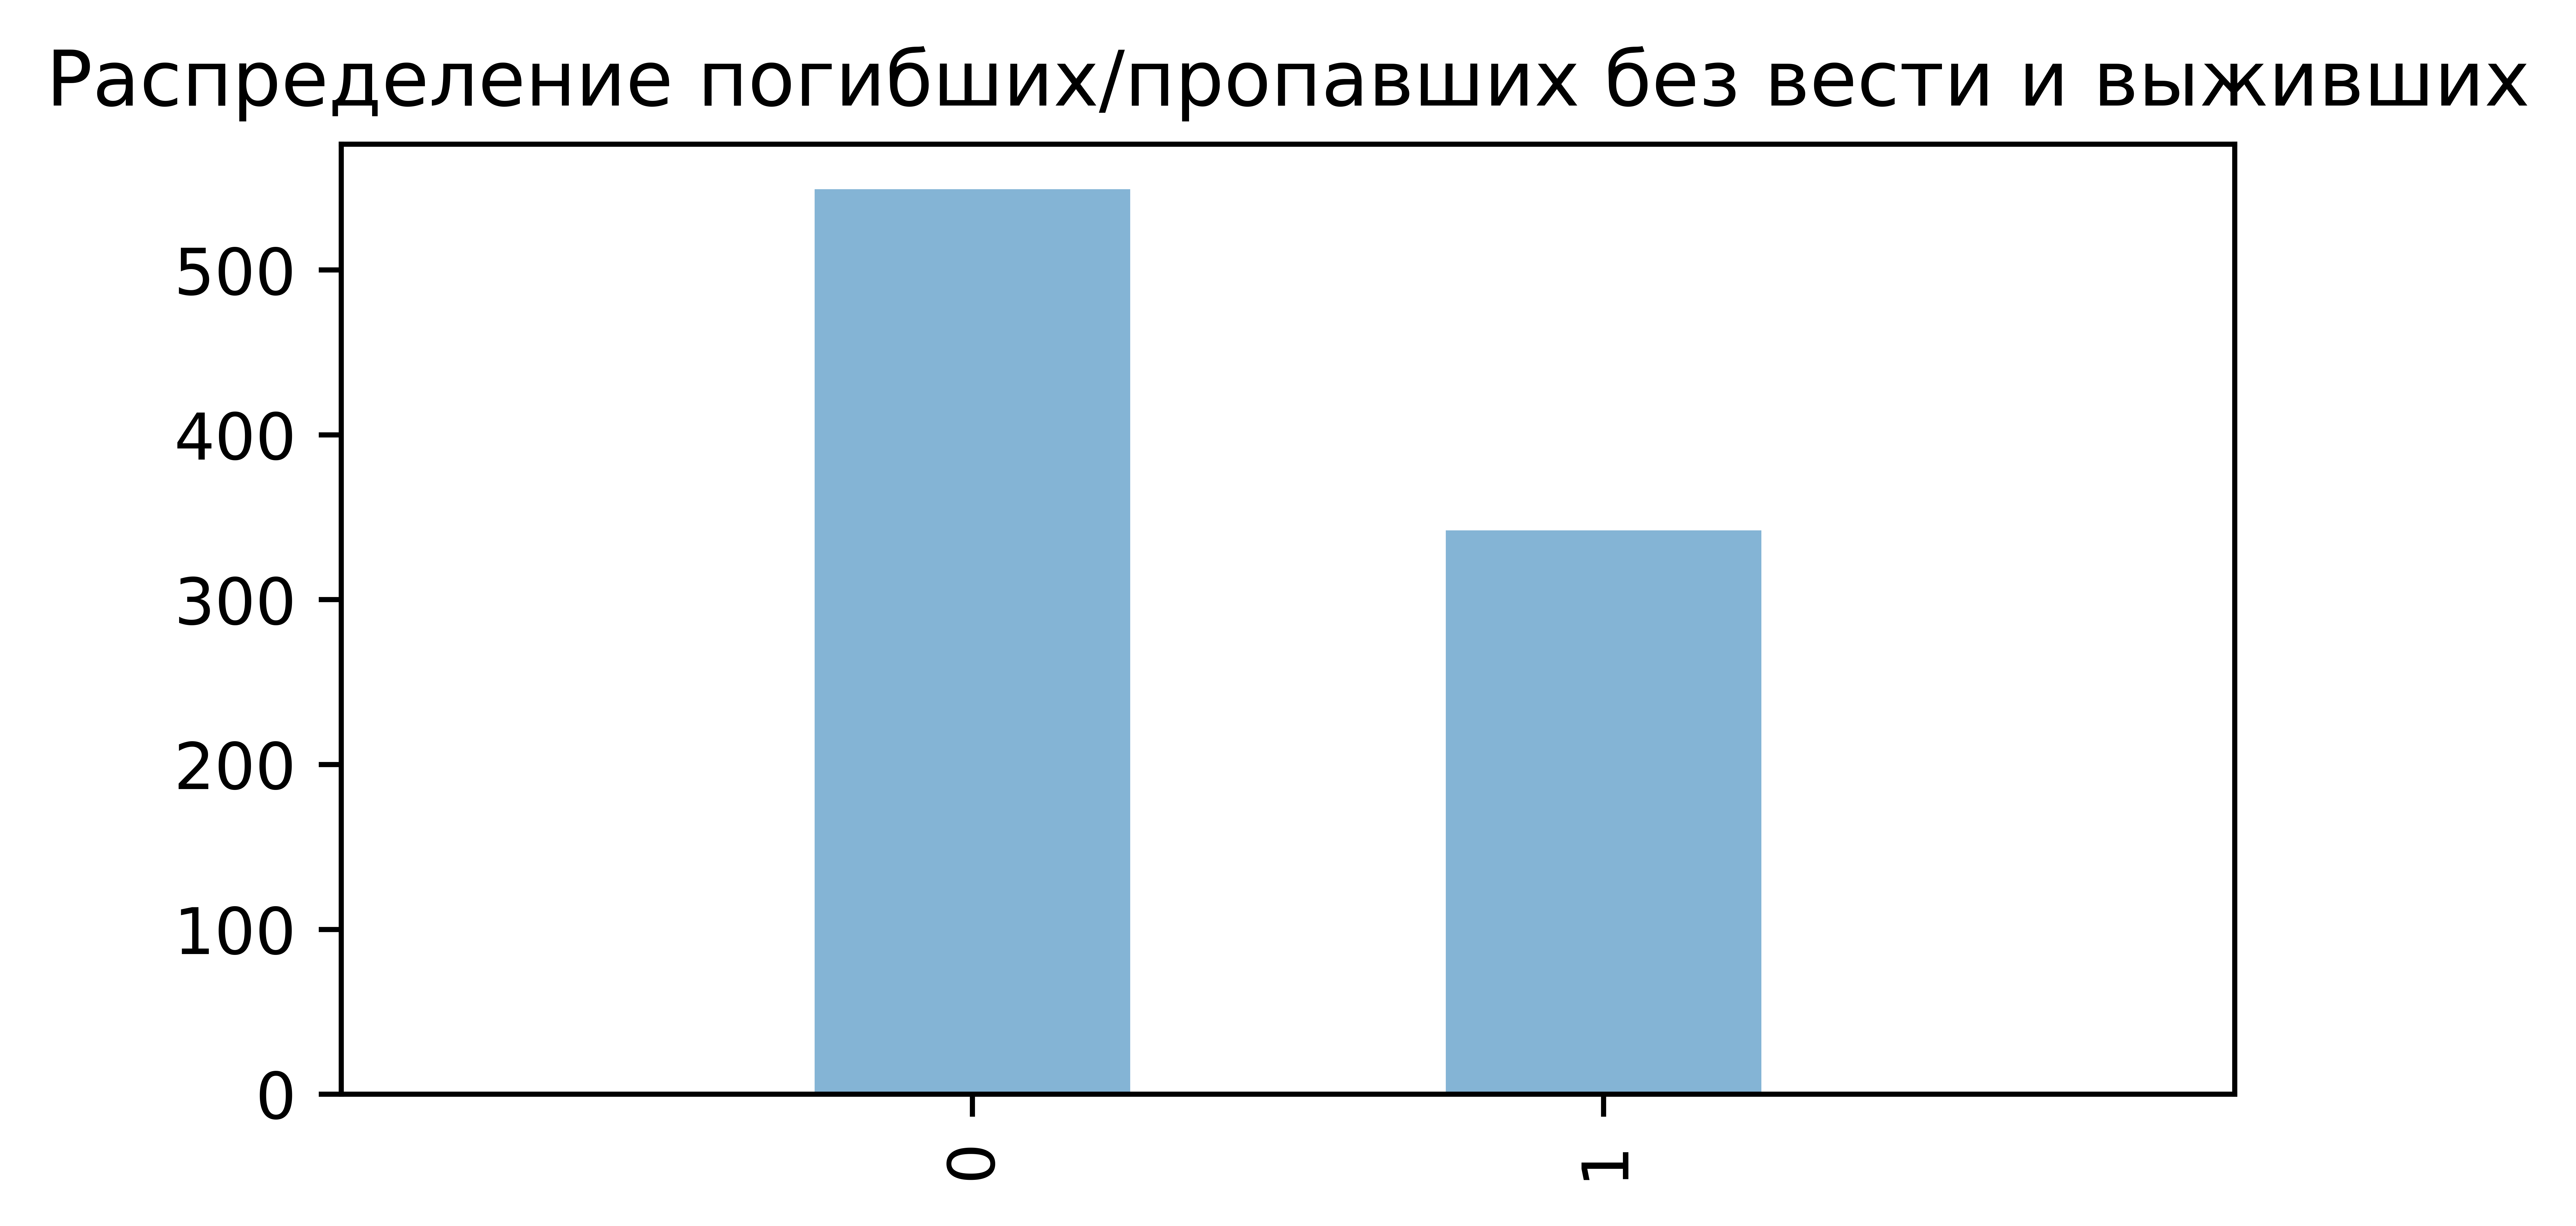

In [15]:
# Указание параметров графика
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# Определение локации в пространстве и размера графика
ax1 = plt.subplot2grid(shape = (2,3),loc = (0,0))

# создание графика с теми кто выжил и кто нет               
train_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)

# Установка границ 
ax1.set_xlim(left = -1, right = len(train_df.Survived.value_counts()))

# Название графика
plt.title("Распределение погибших/пропавших без вести и выживших")

plt.show()

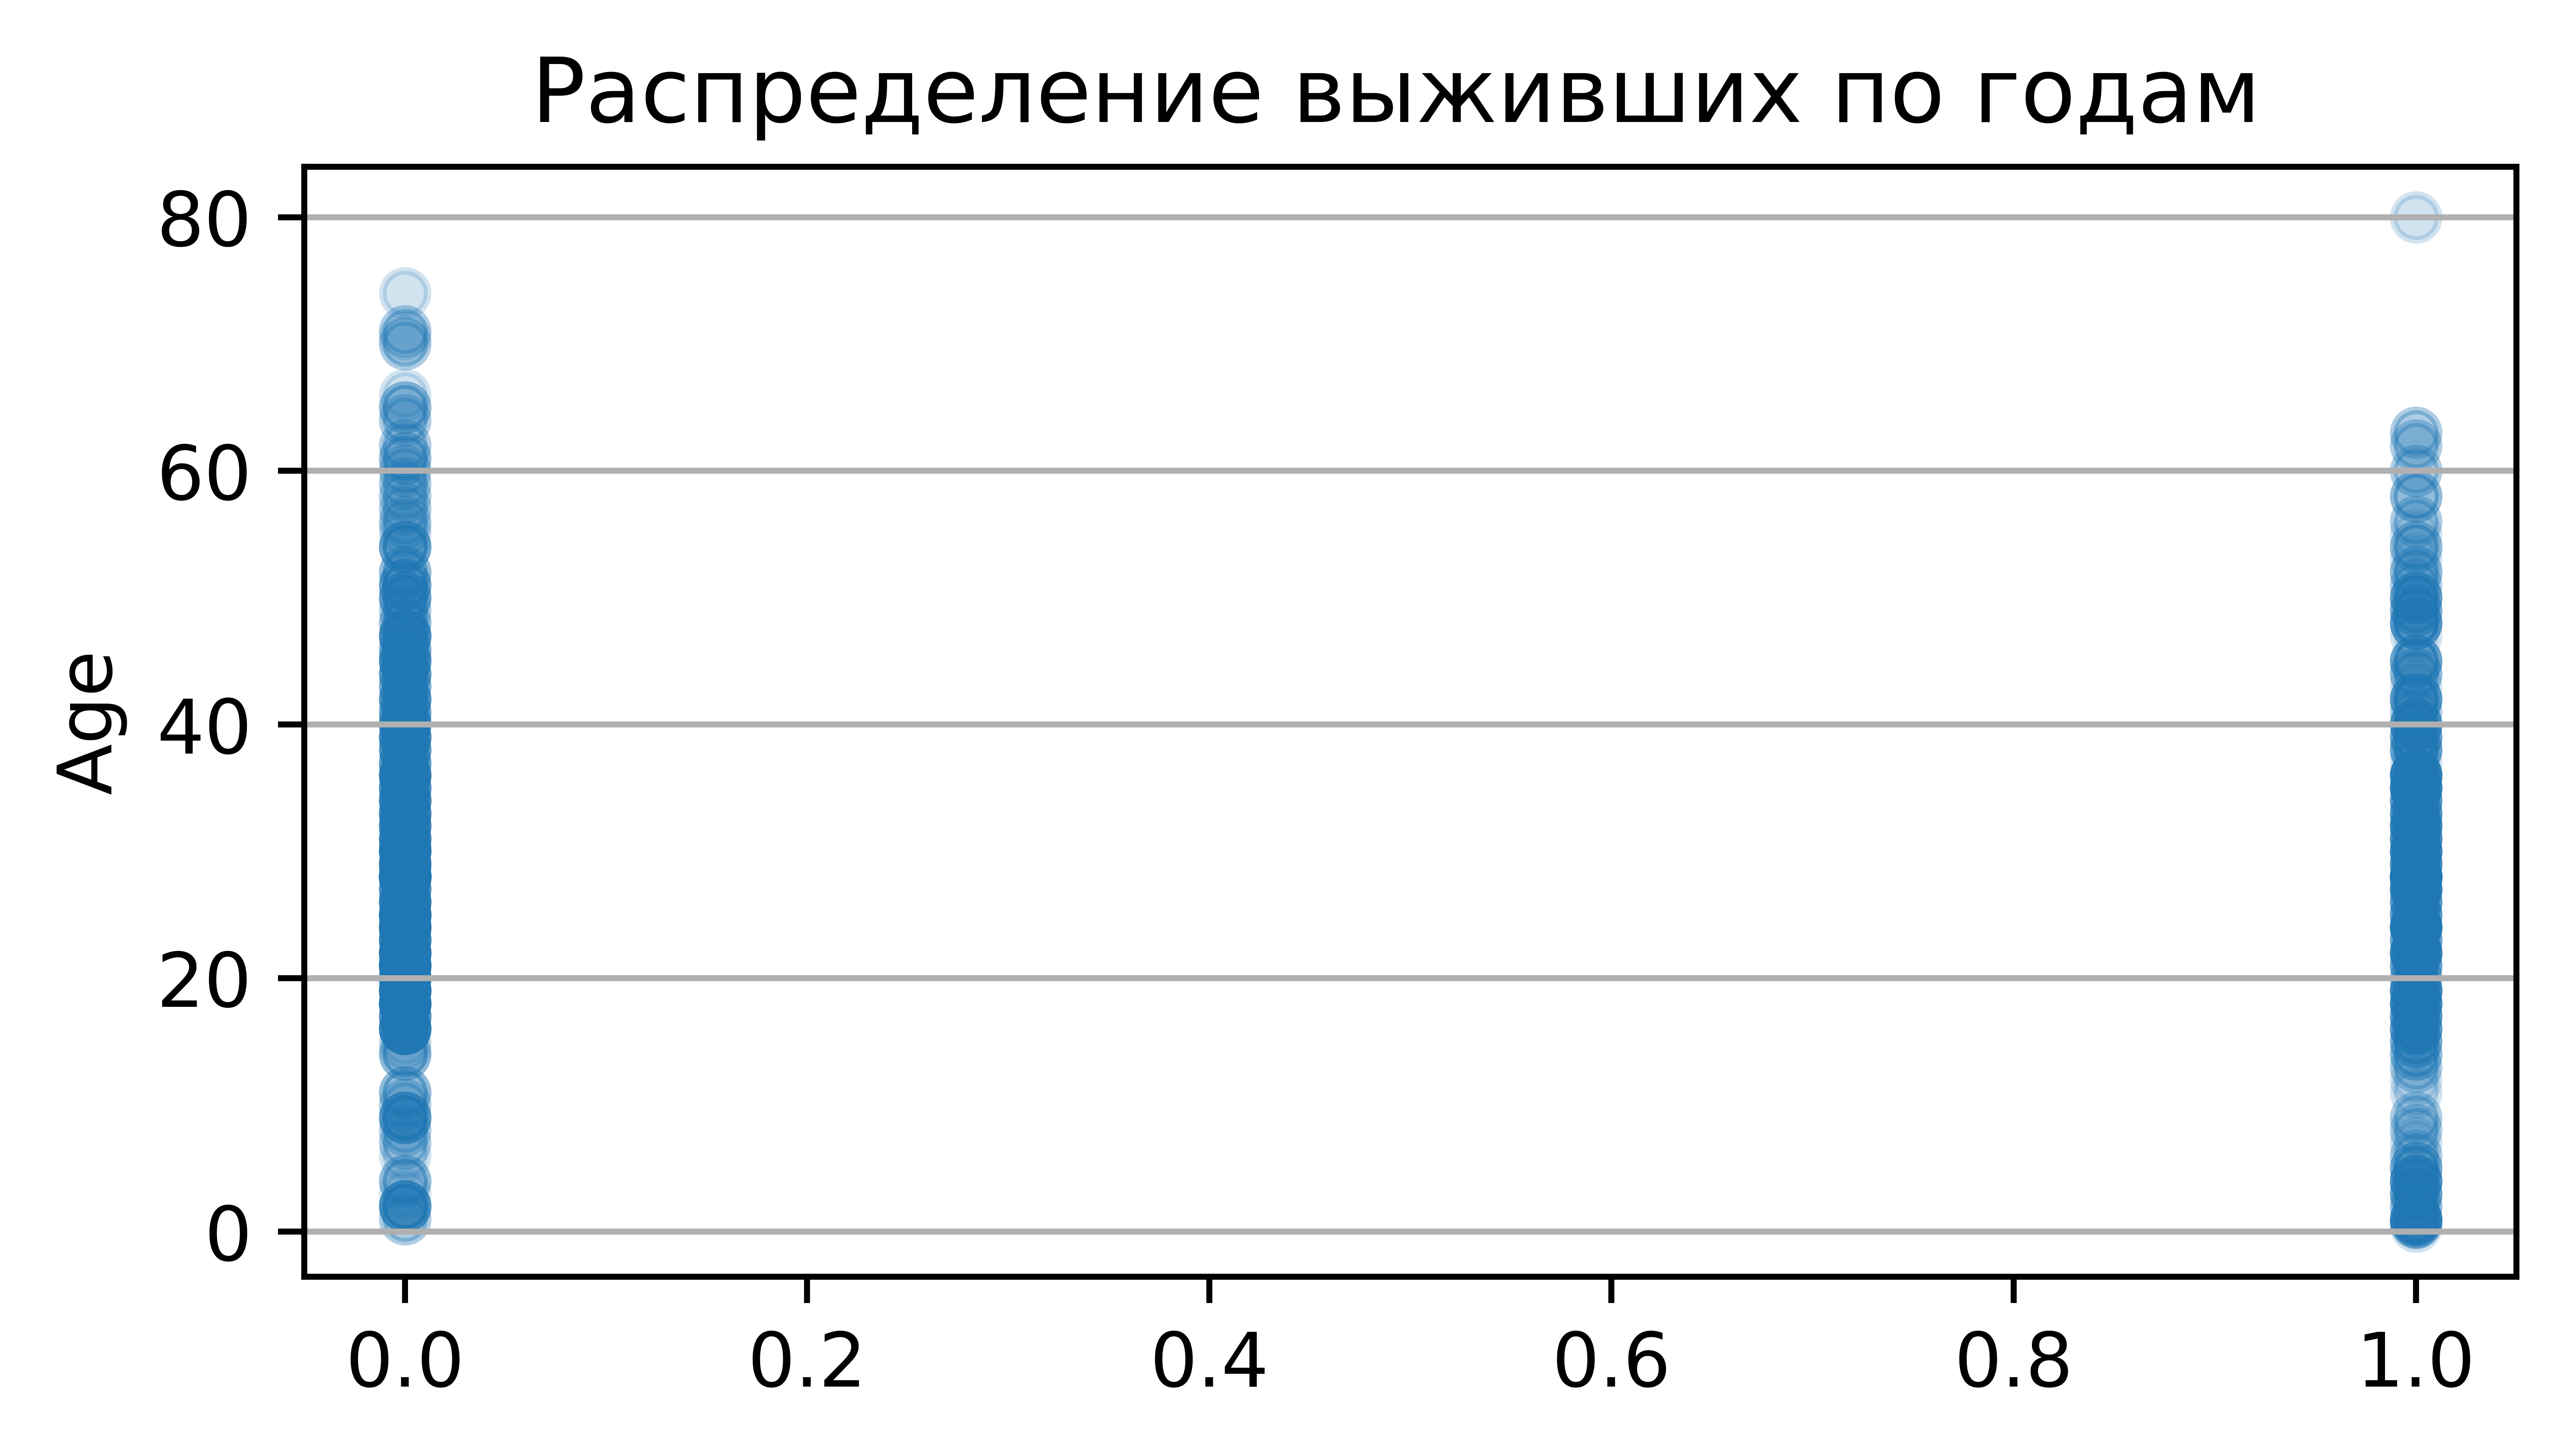

In [16]:
# Указание параметров графика
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_df.Survived, train_df.Age, alpha=alpha_scatterplot)

# название оси y
plt.ylabel("Age")

# formats the grid line style of our graphs                          
plt.grid(visible=True, which='major', axis='y')  
plt.title("Распределение выживших по годам ")

plt.show()

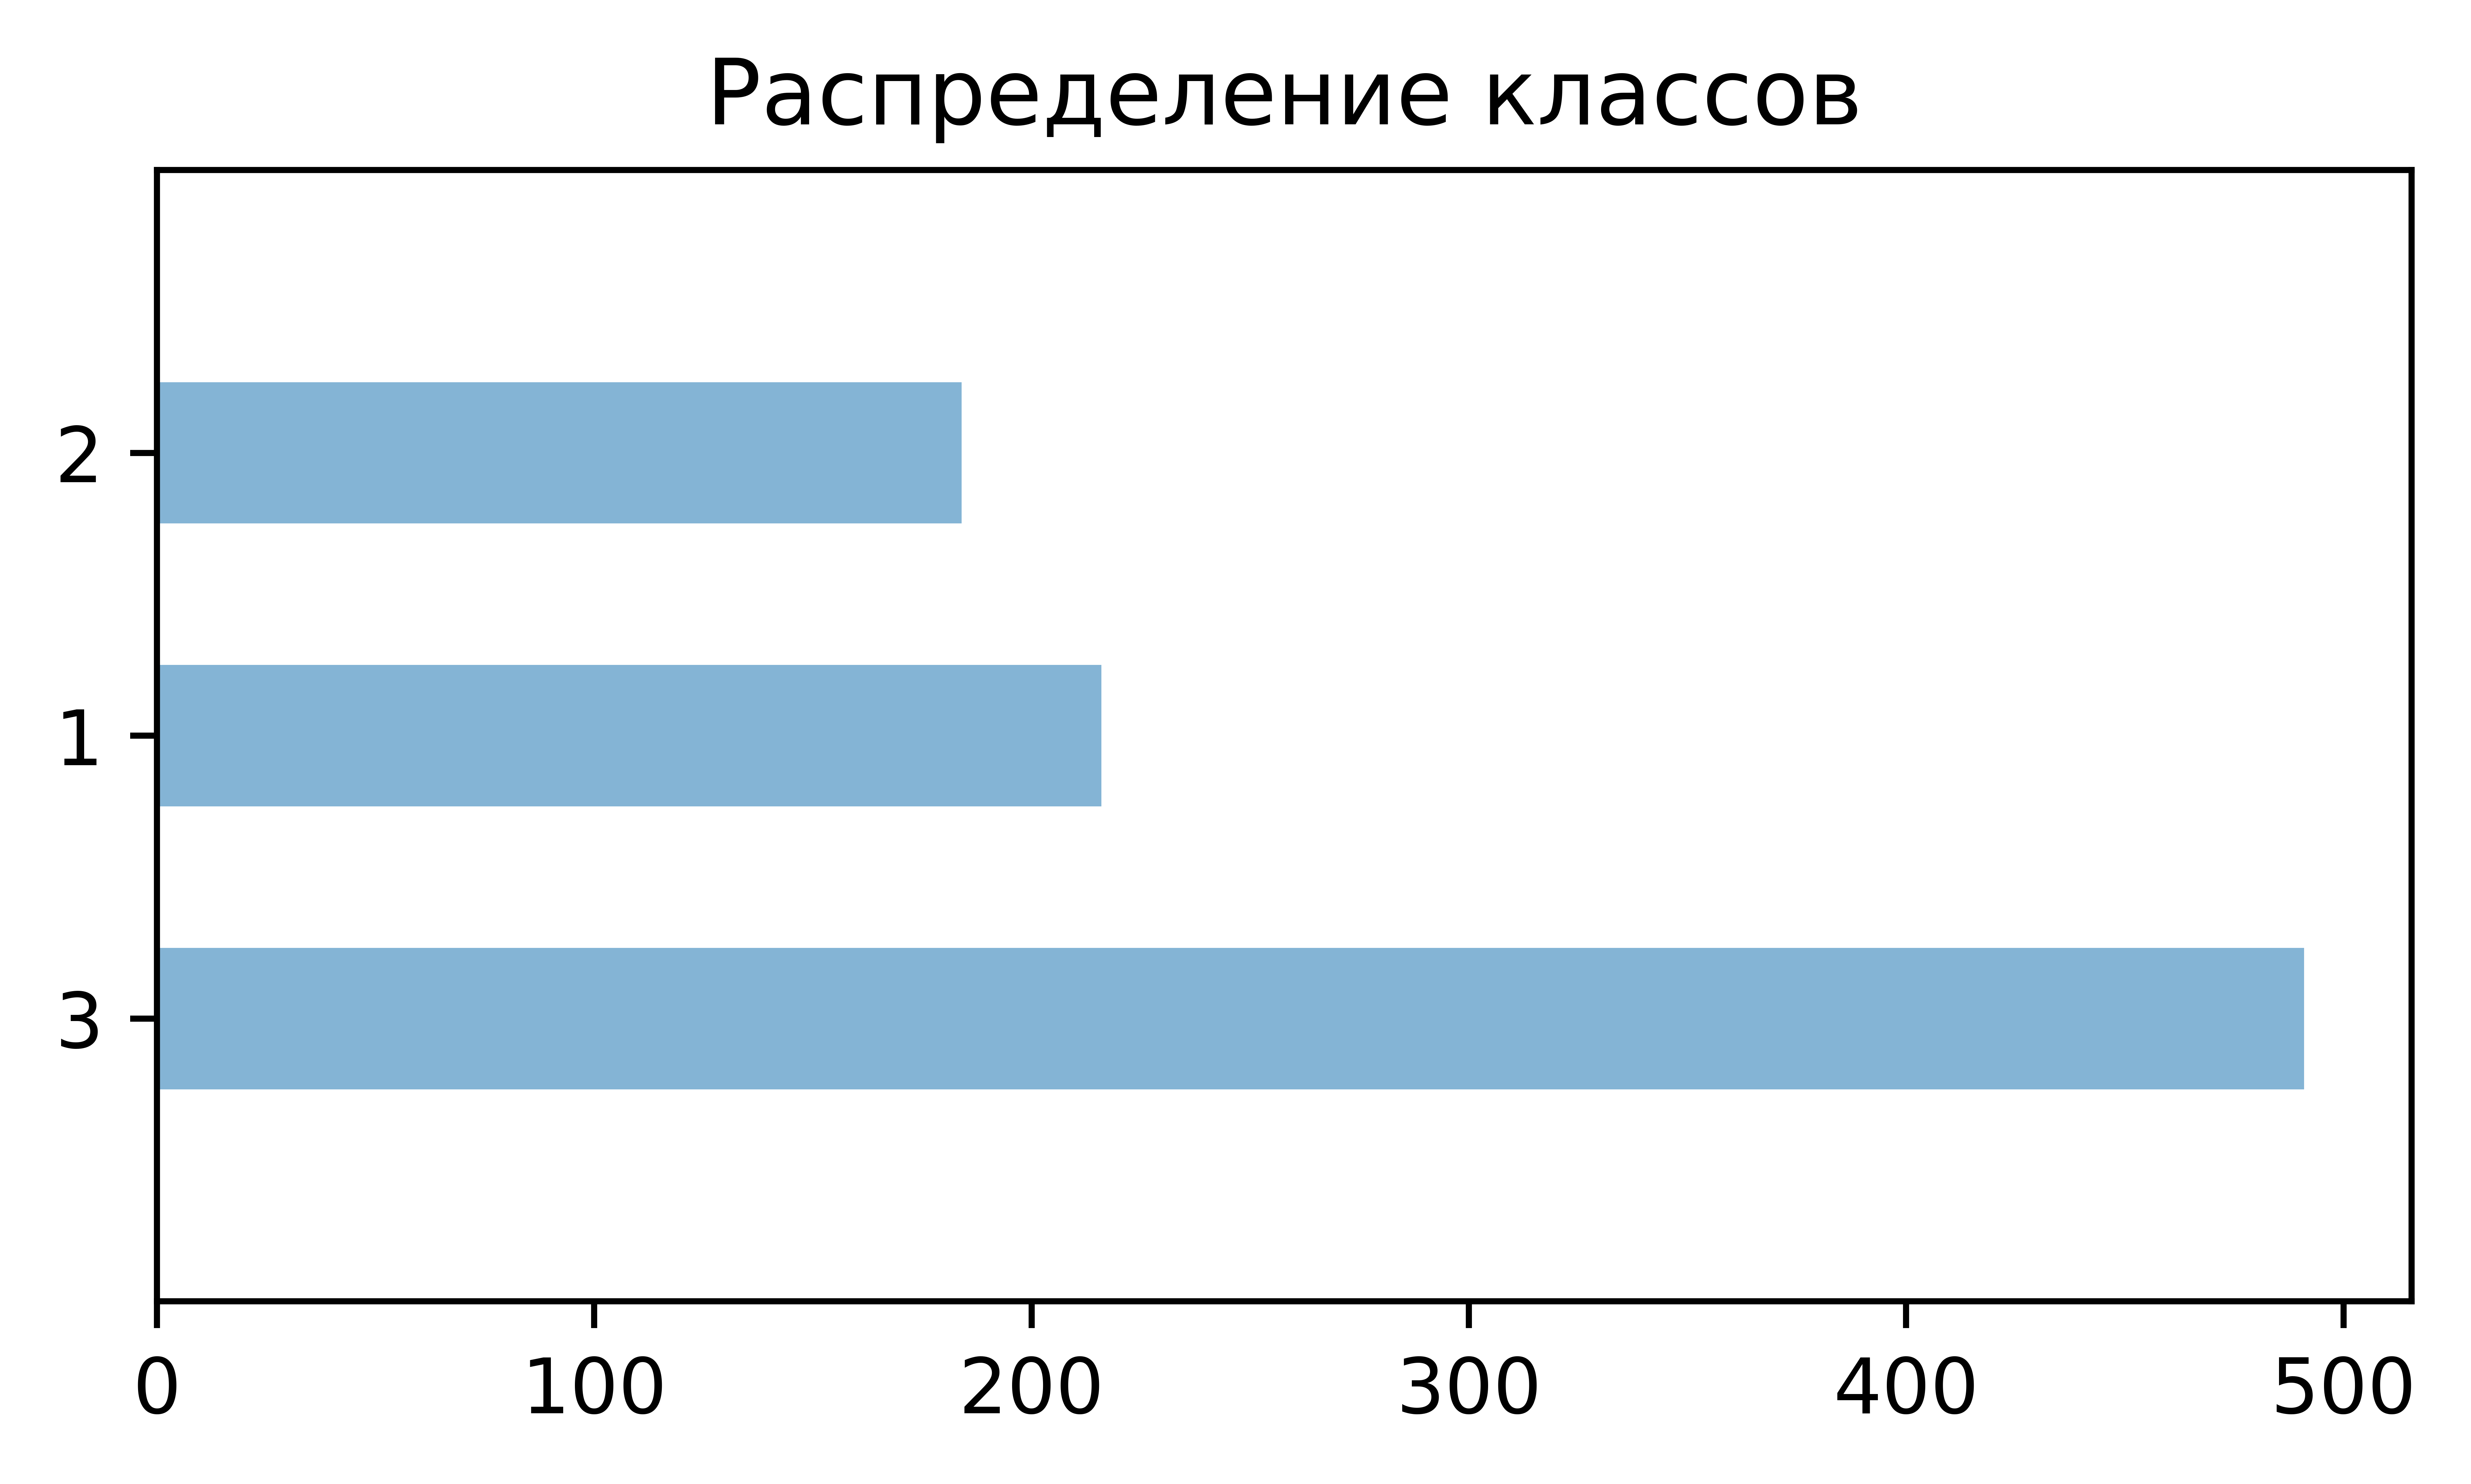

In [17]:
# Указание параметров графика
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax3 = plt.subplot2grid((2,3),(0,2))
train_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train_df.Pclass.value_counts()))
plt.title("Распределение классов")

plt.show()

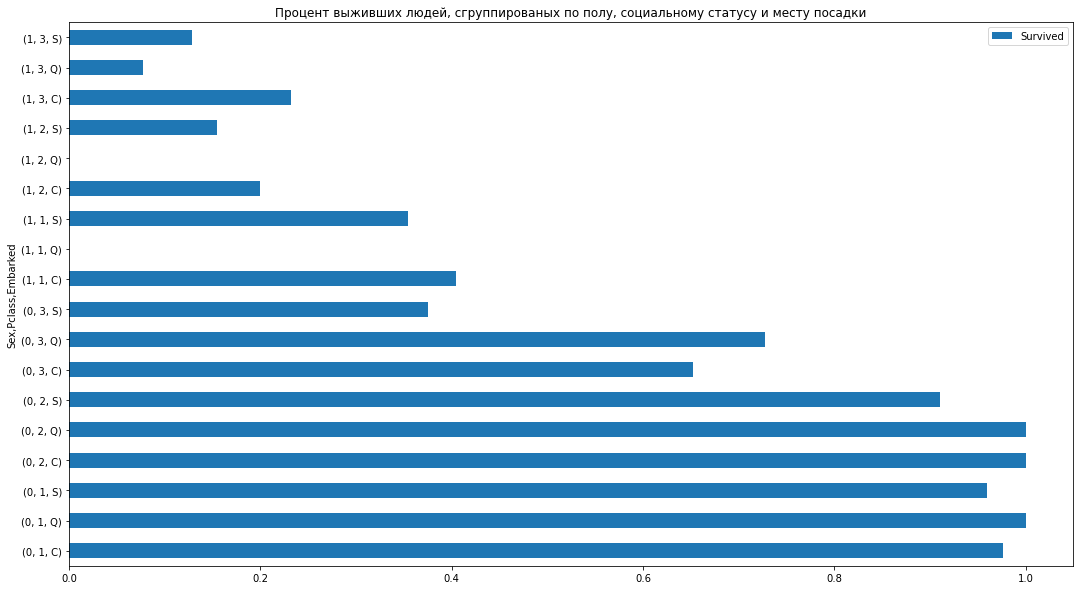

In [18]:
def compu_percentage(array):
    return np.count_nonzero(array)/len(array)
    
train_df.pivot_table('Survived',
                              ['Sex','Pclass','Embarked'], 
                              aggfunc=compu_percentage).\
                                                plot.barh(figsize=(18,10),
                                                title='Процент выживших людей, сгруппированых по полу, социальному статусу и месту посадки')
plt.show()

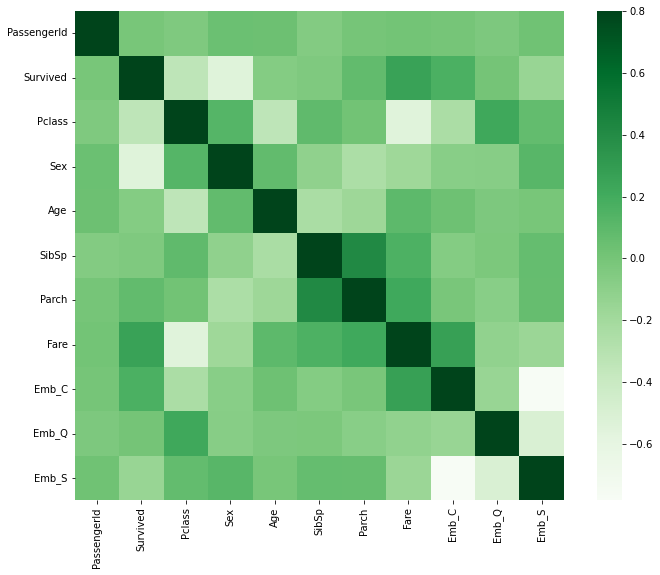

In [19]:
# корреляционная матрица
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap ='Greens');

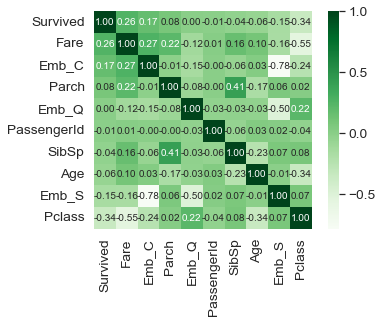

In [20]:
# корреляционная матрица с выраженными значениями
k = 10 # количество переменных для тепловой карты
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap ='Greens')

plt.show()

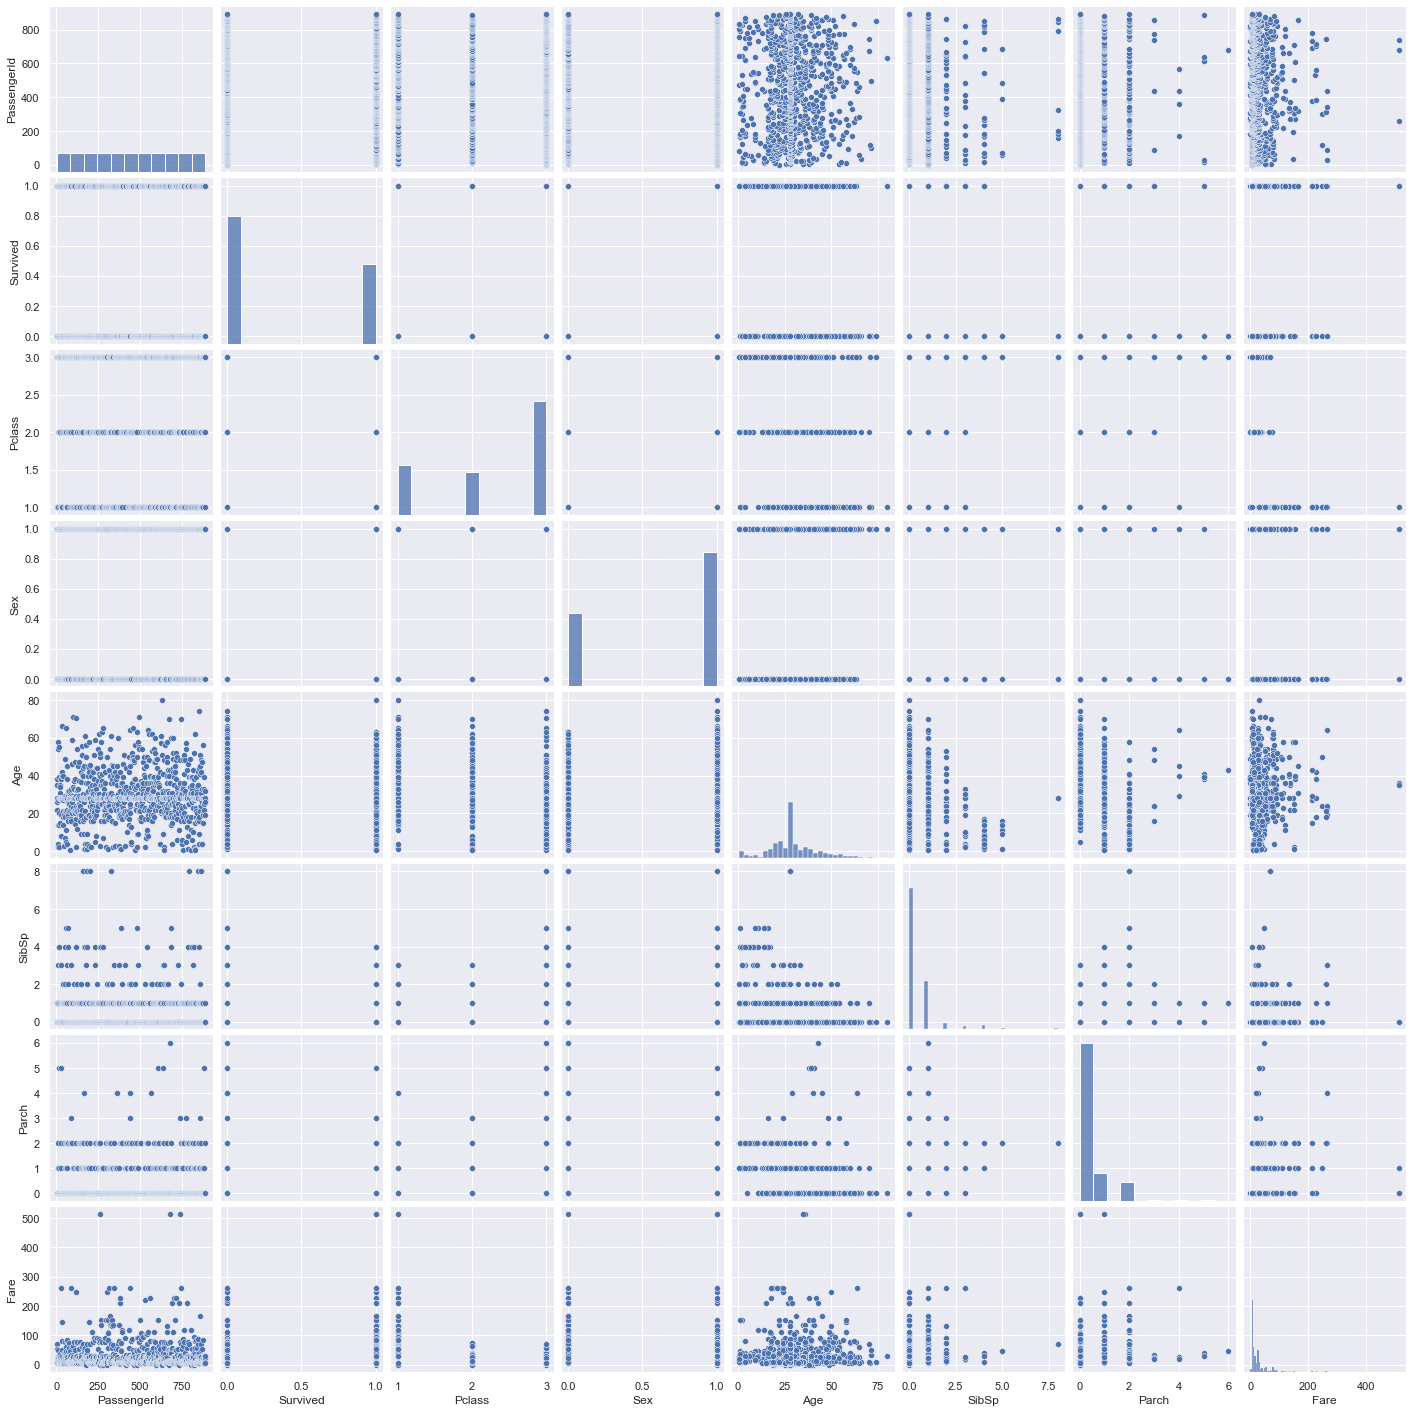

In [21]:
#Кросплоттинг - полезно посмотреть на распределение характеристик относительно друг друга
sns.set()
cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex','Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
sns.pairplot(train_df[cols], height = 2.5)

plt.show();

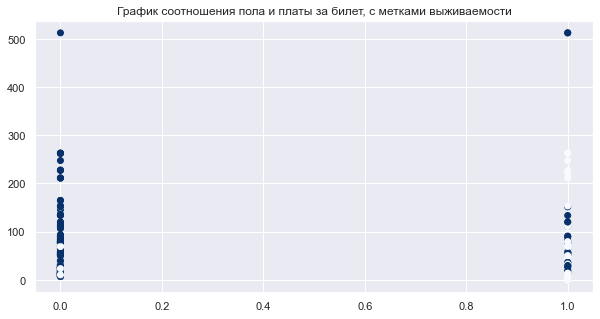

In [22]:
fig = plt.figure(figsize=(10,5))
plt.scatter(train_df['Sex'],train_df['Fare'], c= train_df['Survived'], cmap='Blues')
plt.title('График соотношения пола и платы за билет, с метками выживаемости')

plt.show()

In [23]:
#Удаление метрик, не оказывающих какое-либо влияние на результат предсказания
train_df = train_df.drop(['Name','Ticket','Cabin','Embarked','PassengerId'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [24]:
# Обработка тестовых данных
from sklearn.preprocessing import LabelEncoder

# Заполнение пропущенных значений самым вероятным вариантом
test_df.Embarked.fillna(test_df.Embarked.mode()[0], inplace = True)
# Выделение отдельного класса неизвестных кабин
test_df.Cabin = test_df.Cabin.fillna('NA')
# Офррмление пола как бинарной качественной характеристикой
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])
# Разбор параметра изначального города на 3 параметра
test_dummies = pd.get_dummies(test_df.Embarked, prefix="Emb", drop_first = False)
# Заполнение средним значением пропущенные значения возраста
test_df.Age.fillna(test_df.Age.median(), inplace = True)

test_df = pd.concat([test_df,test_dummies],axis = 1)

test_df = test_df.drop(['Name','Ticket','Cabin','Embarked','PassengerId'], axis=1)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,27.0,0,0,8.0500,0,0,1


In [25]:
#Проверка на наличие пропущенных значений
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Fare,1,0.002392
Pclass,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Emb_C,0,0.000000
Emb_Q,0,0.000000
Emb_S,0,0.000000


In [26]:
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

# Глава 2. Предсказательные модели

In [27]:
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix

In [28]:
# Формирование датасета
train_data = train_df
train_data = train_data.dropna()
feature_train = train_data.drop(['Survived'], axis = 1)
label_train  = train_data['Survived']

In [29]:
feature_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [30]:
label_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
# Разбиение выборки
from sklearn.model_selection import train_test_split


x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(feature_train, label_train, test_size=0.2)

## Naive bayes

NB Accuracy: 73.74%
The cross validated score for Random forest is: 80.06


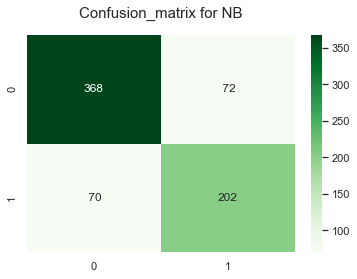

In [32]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf.fit(x_train_all,  np.ravel(y_train_all))
print("NB Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

plt.show()

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LR Accuracy: 73.18%
The cross validated score for Random forest is: 80.06


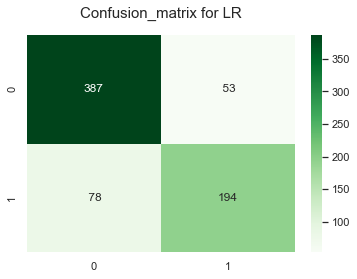

In [34]:
lrs = LogisticRegression(random_state=1,
                    max_iter=100,
                    n_jobs = -1)
lrs.fit(x_train_all,y_train_all)
print("LR Accuracy: "+repr(round(lrs.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(lrs,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for LR', y=1.05, size=15)

plt.show()

## Random forest

RF Accuracy: 78.21%
The cross validated score for Random forest is: 81.75


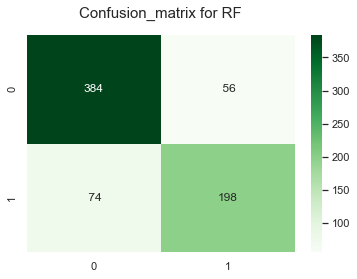

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Задаём первоначальные параметры
clf = RandomForestClassifier(oob_score=True,
                             random_state=1,
                             n_jobs=-1)
clf.fit(x_train_all,  y_train_all)
print("RF Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

plt.show()

### Нахождение оптимальных гиперпараметров

In [36]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Подбор параметра n_estimators (количество деревьев)

In [37]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = np.arange(50,300,10)

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_n_trees =  trees_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 82.26% with 110 trees


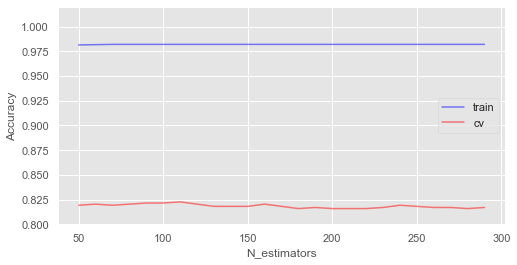

In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.8,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

plt.show()

Подбор параметра max_depths

In [39]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=opt_n_trees, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_max_depth = max_depth_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 84.06% with 9 max_depth


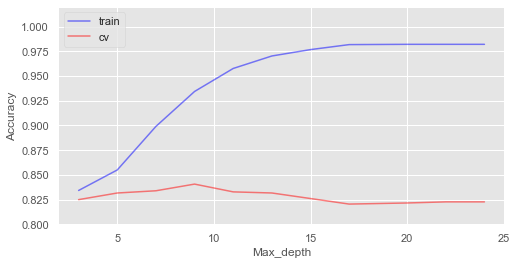

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.8,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

plt.show()

Подбор параметра min_samples_leaf

In [41]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=opt_n_trees, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_min_samples_leaf =   min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 83.72% with 3 min_samples_leaf


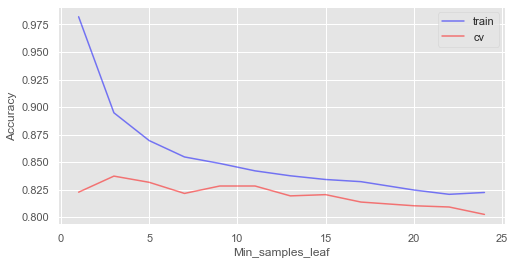

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

plt.show()

Подбор параметра max_features

In [43]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = np.arange(1,10).tolist()

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_max_features = max_features_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 82.71% with 5 max_features


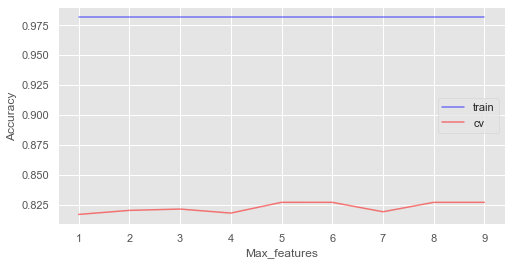

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

plt.show()

Используем оптимальные параметры:

RF Accuracy: 80.45%
The cross validated score for Random forest is: 84.13


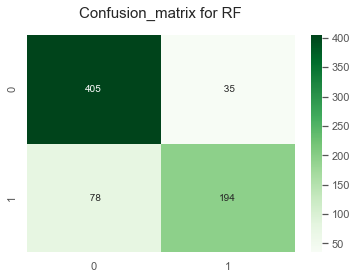

In [45]:
clf = RandomForestClassifier(criterion='gini', 
                             n_estimators=opt_n_trees,
                             min_samples_leaf= opt_min_samples_leaf,
                             max_features=opt_max_features,
                             max_depth= opt_max_depth,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)


clf.fit(x_train_all,  y_train_all)
print("RF Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

plt.show()

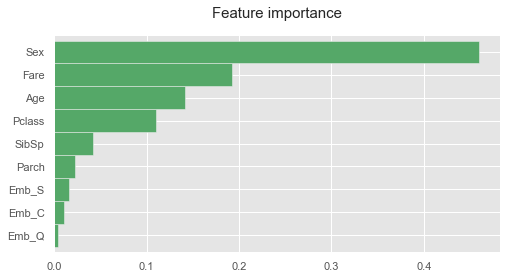

In [46]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(clf.feature_importances_, feature_train.columns ).sort_values(ascending=True).plot.barh(width=1, color='g')
plt.title('Feature importance', y=1.05, size=15)

plt.show()

## GradientBoosting

GBS Accuracy: 82.68%
The cross validated score for GradientBoosting is: 82.44


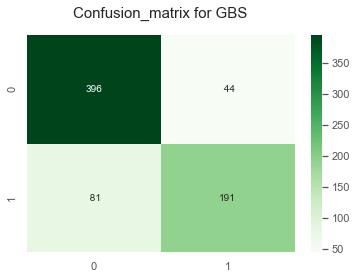

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=1)

clf.fit(x_train_all,  np.ravel(y_train_all))
print("GBS Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for GradientBoosting is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for GBS', y=1.05, size=15)

plt.show()

### Нахождение оптимальных гиперпараметров

In [48]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Подбор оптимального n_estimators

In [49]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
stages_grid = np.arange(5,400,10)

# Обучаем на тренировочном датасете
for nstages in stages_grid:
    gbc = GradientBoostingClassifier(n_estimators=nstages,
                                 loss = 'exponential',
                                 random_state=42)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        gbc.fit(X_train, y_train)
        temp_train_acc.append(gbc.score(X_train, y_train))
        temp_test_acc.append(gbc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_n_stages =  stages_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} stages".format(max(test_acc.mean(axis=1))*100, 
                                                        stages_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 83.84% with 375 stages


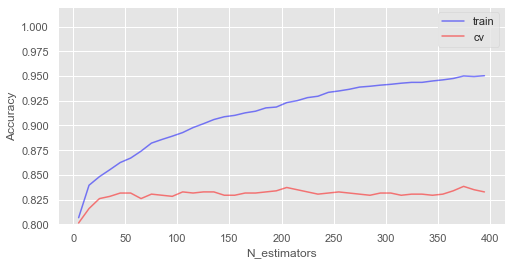

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(stages_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(stages_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.8,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

plt.show()

Подбор оптимального min_samples_leaf

In [51]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    gbc = GradientBoostingClassifier(n_estimators=opt_n_stages, 
                                 random_state=42,
                                 loss = 'exponential',
                                 min_samples_leaf = min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        gbc.fit(X_train, y_train)
        temp_train_acc.append(gbc.score(X_train, y_train))
        temp_test_acc.append(gbc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_min_samples_leaf =   min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 83.95% with 7 min_samples_leaf


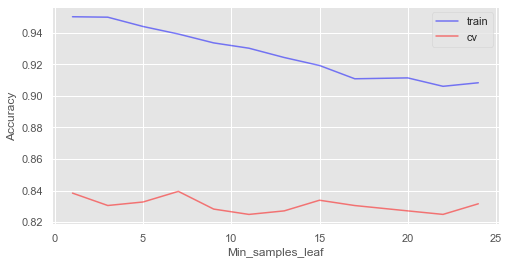

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

plt.show()

Подбор оптимального max_depths

In [53]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    gbc = GradientBoostingClassifier(n_estimators=opt_n_stages, 
                                 loss = 'exponential',
                                 random_state=42,
                                 max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        gbc.fit(X_train, y_train)
        temp_train_acc.append(gbc.score(X_train, y_train))
        temp_test_acc.append(gbc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_max_depth = max_depth_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 83.84% with 3 max_depth


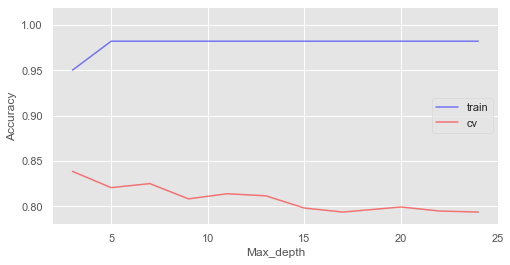

In [54]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.78,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

plt.show()

Подбор оптимального max_features

In [55]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = np.arange(1,10).tolist()

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    gbc = GradientBoostingClassifier(n_estimators=opt_n_stages, 
                                 loss = 'exponential',
                                 random_state=42,
                                 max_features = max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(feature_train, label_train):
        X_train, X_test = feature_train.iloc[train_index], feature_train.iloc[test_index]
        y_train, y_test = label_train[train_index], label_train[test_index]
        gbc.fit(X_train, y_train)
        temp_train_acc.append(gbc.score(X_train, y_train))
        temp_test_acc.append(gbc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
opt_max_features = max_features_grid[np.argmax(test_acc.mean(axis=1))]
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 83.84% with 6 max_features


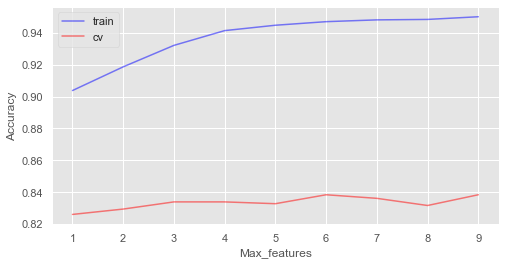

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

plt.show()

GBS Accuracy: 82.12%
The cross validated score for GradientBoosting is: 83.71


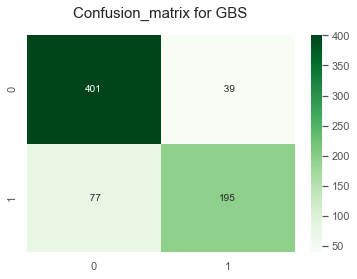

In [57]:
clf = GradientBoostingClassifier(n_estimators= opt_n_stages,
                             min_samples_leaf= opt_min_samples_leaf,
                             max_depth= opt_max_depth,
                             max_features=opt_max_features,
                             loss = 'exponential',
                             random_state=1)

clf.fit(x_train_all,  np.ravel(y_train_all))
print("GBS Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for GradientBoosting is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for GBS', y=1.05, size=15)

plt.show()

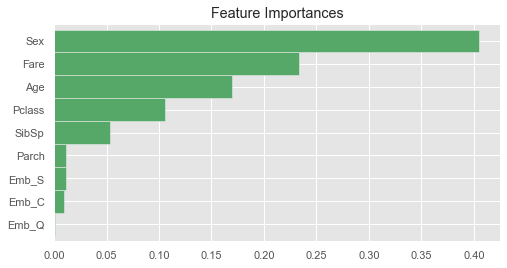

In [58]:
fig, ax = plt.subplots(figsize=(8, 4))
pd.Series(clf.feature_importances_, feature_train.columns ).sort_values(ascending=True).plot.barh(width=1, color='g')
plt.title('Feature Importances')

plt.show()

## Support Vector Machine(SVM)

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

SVM Accuracy: 69.83%
The cross validated score for SVM is: 66.01


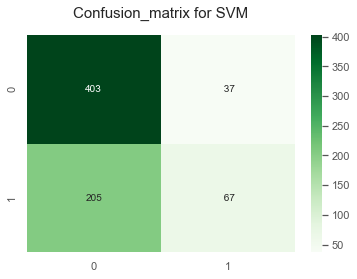

In [60]:
clf = SVC()

clf.fit(x_train_all,  np.ravel(y_train_all))
print("SVM Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for SVM is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for SVM', y=1.05, size=15)

plt.show()

In [61]:
svm = SVC()
params = {'C' :[1,3,5],
          'gamma': ['scale','auto'],
          'tol':[1e-3,1e-4]
    
}
rsCV = RandomizedSearchCV(estimator=svm,
                          param_distributions=params,
                          n_jobs=-1,
                          cv=5
                         )
search = rsCV.fit(x_train_all,  np.ravel(y_train_all))
best_params = search.best_params_
best_params

{'tol': 0.001, 'gamma': 'auto', 'C': 5}

SVM-tuned Accuracy: 73.18%
The cross validated score for SVM-tuned is: 72.19


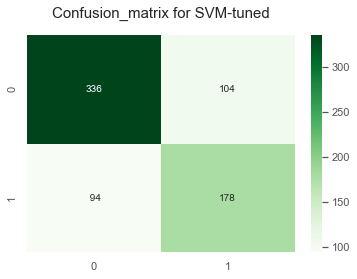

In [62]:
clf = SVC(**best_params)

clf.fit(x_train_all,  np.ravel(y_train_all))
print("SVM-tuned Accuracy: "+repr(round(clf.score(x_test_all, y_test_all) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train_all,y_train_all,cv=10,scoring='accuracy')
print('The cross validated score for SVM-tuned is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train_all,y_train_all,cv=10)
sns.heatmap(confusion_matrix(y_train_all,y_pred),annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion_matrix for SVM-tuned', y=1.05, size=15)

plt.show()

## XGBoost

In [63]:
import xgboost as xgb

import shap
import matplotlib.pyplot as pl

shap.initjs()

C:\Users\gryaz\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [64]:
dt = xgb.DMatrix(x_train_all, label=y_train_all.values)
dv = xgb.DMatrix(x_test_all, label=y_test_all.values)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [65]:
params = params = {
    "eta": 0.5,
    "max_depth": opt_max_depth,
    "objective": "binary:logistic",
    "base_score": np.mean(y_train_all),
    "eval_metric": "logloss"
}
    
model = xgb.train(params, dt, 100, [(dt, "train"), (dv, "valid")], early_stopping_rounds=10, verbose_eval=25)

[0]	train-logloss:0.49207	valid-logloss:0.53087
[24]	train-logloss:0.27052	valid-logloss:0.45226


In [66]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test_all)

In [67]:
shap_values = explainer.shap_values(x_test_all, check_additivity=False)

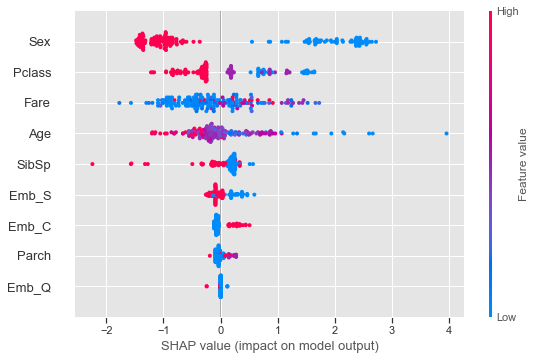

In [68]:
shap.summary_plot(shap_values, x_test_all)